# Entrega 3

Presentado por: Juan Carlos Pérez B.

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [185]:
data = pd.read_csv('iris.data',names=['sepal_length','sepal_width','petal_length','petal_width','class'])

In [186]:
# Seleccion de las dos features
x1 = data['sepal_length']
x2 = data['petal_length']

cl = data['class']


In [187]:
class_0 = cl == 'Iris-setosa'
class_1 = cl != 'Iris-setosa'
class_2 = cl == 'Iris-versicolor'
class_3 = cl == 'Iris-virginica'
clb =class_0.astype(int)
    

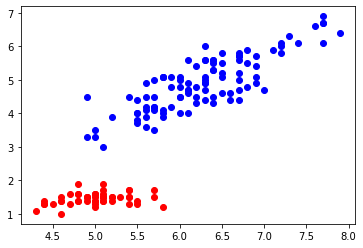

In [188]:
plt.plot(x1[class_0],x2[class_0],'o',c='red',label='Iris-setosa')
plt.plot(x1[class_1],x2[class_1],'o',c='blue',label='Otras')

In [189]:
#-- Esta es la función que queremos encontrar
def y(x):
    return -(b + w_1*x)/w_2
#-- Definimos nuestra función de activación, en este caso usamos un Sigmoide
def act(z):
    return 1/(1 + np.exp(-z))

Epoch [1/10], bias: 0.5, w1: -2.5, w2: -1.35


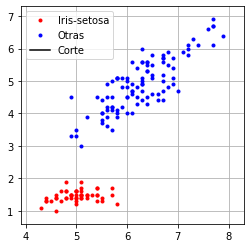

Epoch [2/10], bias: 1.0, w1: 0.04999999999999982, w2: -0.6500000000000001


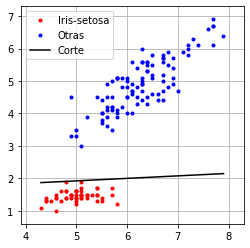

Epoch [3/10], bias: 1.0, w1: 0.04999999999999982, w2: -0.6500000000000001


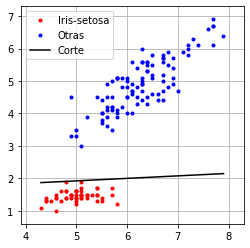

Epoch [4/10], bias: 1.0, w1: 0.04999999999999982, w2: -0.6500000000000001


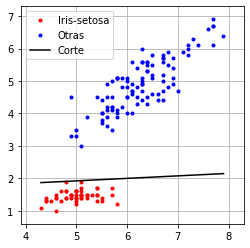

Epoch [5/10], bias: 1.0, w1: 0.04999999999999982, w2: -0.6500000000000001


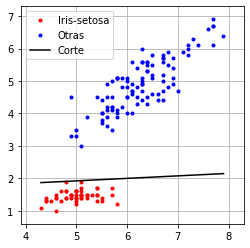

Epoch [6/10], bias: 1.0, w1: 0.04999999999999982, w2: -0.6500000000000001


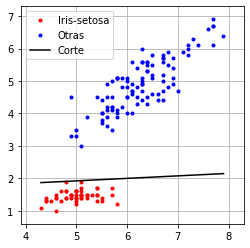

Epoch [7/10], bias: 1.0, w1: 0.04999999999999982, w2: -0.6500000000000001


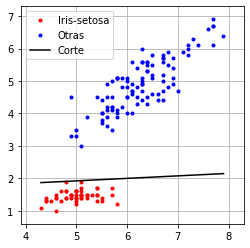

Epoch [8/10], bias: 1.0, w1: 0.04999999999999982, w2: -0.6500000000000001


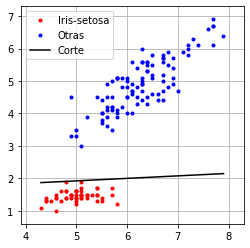

Epoch [9/10], bias: 1.0, w1: 0.04999999999999982, w2: -0.6500000000000001


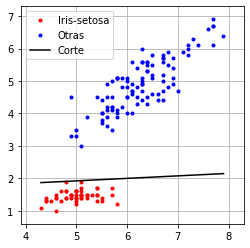

Epoch [10/10], bias: 1.0, w1: 0.04999999999999982, w2: -0.6500000000000001


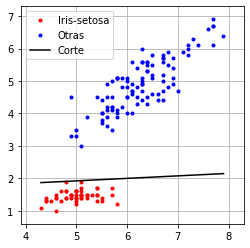

In [190]:
# Inicializamos los pesos en 0
b = 1
w_1 = 1
w_2 = 1

# Inicializamos el número de épocas y la rata de aprendizaje
n_epochs = 10 # Número de épocas
n = 0.5 # Tasa de aprendizaje

# Entrenamos el Perceptron
for epoch in range(n_epochs):
    for i,j,k in zip(x1,x2,clb):
    
        # Función de Suma
        z = i*w_1 + j*w_2 + b

        # Función de Activación
        sig_z = act(z)

        # Evaluamos la salida (output)
        if sig_z >= 0.5:
            out = 1
        if sig_z < 0.5:
            out = 0

        # Calculamos el error
        error = k - out

        # Actualizamos los pesos
        b = b + n*error
        w_1 += n*error*i
        w_2 += n*error*j

    print('Epoch [{}/{}], bias: {}, w1: {}, w2: {}'.format(epoch+1,n_epochs,b,w_1,w_2))

    fig = plt.figure(figsize=(4,4))
    plt.plot(x1[class_0],x2[class_0],'.',c='red',label='Iris-setosa')
    plt.plot(x1[class_1],x2[class_1],'.',c='blue',label='Otras')
    plt.plot(np.sort(x1),y(np.sort(x1)),'-', c='black',label='Corte')
    plt.xlim(min(x1)-0.4,max(x1)+0.4)
    plt.ylim(min(x2)-0.4,max(x2)+0.4)
    plt.legend()
    plt.grid()
    plt.show()

### Parte 2

In [223]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [224]:
X= data.drop(['class'],axis='columns')
Y= data['class']
Y1=Y.astype('category').cat.codes

In [225]:
data.dtypes

sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
class           category
dtype: object

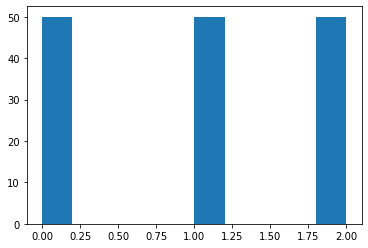

In [227]:
plt.hist(Y1)
plt.show()

Dos capas: 

In [232]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y1)
model = MLPClassifier(activation='relu',  hidden_layer_sizes=(4, 4), solver='adam', learning_rate_init=0.1)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
accuracy_score(Y_pred,Y_test)

0.9210526315789473

Tres capas:

In [233]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y1)
model = MLPClassifier(activation='relu',  hidden_layer_sizes=(4,4,4), solver='adam', learning_rate_init=0.1)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
accuracy_score(Y_pred,Y_test)

0.9473684210526315

El código se basa en los ejemplos de los notebook presentados en clase:
Se pueden encontrar en https://github.com/ComputoCienciasUniandes/IntroDeepLearning_202102